In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('../data.csv')

labels = pd.read_csv('../labels.csv')

In [21]:
df

,sequence,#RSS_anchor1,RSS_anchor2,RSS_anchor3,RSS_anchor4,step
0,0,-0.90476,-0.48000,0.28571,0.30000,0
1,0,-0.57143,-0.32000,0.14286,0.30000,1
2,0,-0.38095,-0.28000,-0.14286,0.35000,2
3,0,-0.28571,-0.20000,-0.47619,0.35000,3
4,0,-0.14286,-0.20000,0.14286,-0.20000,4
...,...,...,...,...,...,...
13192,313,-0.50000,-0.60000,0.73333,1.00000,40
13193,313,-0.50000,-0.46667,0.73333,1.00000,41
13194,313,-0.50000,-0.42222,0.73333,0.36170,42
13195,313,-0.40909,-0.33333,0.55556,-0.31915,43


In [22]:
labels

,class_label
0,1
1,1
2,1
3,1
4,1
...,...
309,-1
310,-1
311,-1
312,-1


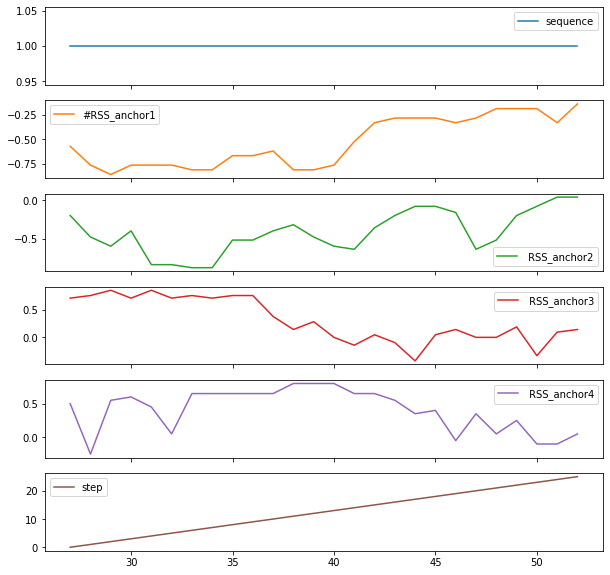

In [23]:
# see a sample with class_label 1
df[df['sequence'] == 1].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

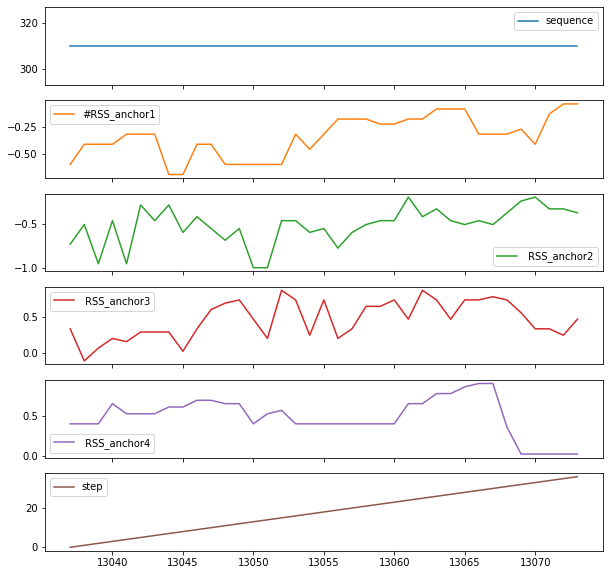

In [24]:
# see a sample with class_label -1
df[df['sequence'] == 310].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

In [25]:
from tsfresh import extract_features

extracted_features = extract_features(df, column_id='sequence', column_sort='step')

Feature Extraction: 100%|██████████| 1256/1256 [01:15<00:00, 16.70it/s]


In [26]:
extracted_features

,#RSS_anchor1__variance_larger_than_standard_deviation,#RSS_anchor1__has_duplicate_max,#RSS_anchor1__has_duplicate_min,#RSS_anchor1__has_duplicate,#RSS_anchor1__sum_values,#RSS_anchor1__abs_energy,#RSS_anchor1__mean_abs_change,#RSS_anchor1__mean_change,#RSS_anchor1__mean_second_derivative_central,#RSS_anchor1__median,...,RSS_anchor4__permutation_entropy__dimension_6__tau_1,RSS_anchor4__permutation_entropy__dimension_7__tau_1,RSS_anchor4__query_similarity_count__query_None__threshold_0.0,"RSS_anchor4__matrix_profile__feature_""min""__threshold_0.98","RSS_anchor4__matrix_profile__feature_""max""__threshold_0.98","RSS_anchor4__matrix_profile__feature_""mean""__threshold_0.98","RSS_anchor4__matrix_profile__feature_""median""__threshold_0.98","RSS_anchor4__matrix_profile__feature_""25""__threshold_0.98","RSS_anchor4__matrix_profile__feature_""75""__threshold_0.98",RSS_anchor4__mean_n_absolute_max__number_of_maxima_7
0,0.0,1.0,0.0,1.0,-6.285731,2.680275,0.142857,0.029304,-0.009524,-0.142860,...,3.091042,3.044522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.471429
1,0.0,0.0,0.0,1.0,-13.809480,8.920572,0.074284,0.017143,0.007936,-0.595240,...,2.780466,2.830940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.714286
2,0.0,0.0,1.0,1.0,-15.238070,11.541914,0.129871,0.038961,-0.012472,-0.714290,...,2.890372,2.833213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.757143
3,0.0,1.0,1.0,1.0,-16.571440,12.879833,0.196970,0.019480,-0.007937,-0.666670,...,2.890372,2.833213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.750000
4,0.0,1.0,1.0,1.0,-20.095250,17.106589,0.190476,0.019841,-0.009317,-0.904760,...,2.857103,2.871476,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.792857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,0.0,1.0,1.0,1.0,-23.818165,17.301623,0.090908,0.000000,0.000000,-0.590910,...,2.911131,3.084959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.629177
310,0.0,1.0,1.0,1.0,-12.499997,5.435954,0.075758,0.015152,-0.002597,-0.318180,...,2.430901,2.691218,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.811549
311,0.0,1.0,0.0,1.0,-14.772750,7.320276,0.108109,0.014742,-0.001894,-0.386365,...,2.873694,3.162484,NaN,1.319034,3.239646,2.251467,2.196834,1.896817,2.657071,0.854101
312,0.0,1.0,1.0,1.0,-17.727340,9.371955,0.085082,-0.012821,0.000000,-0.454550,...,3.047341,3.322494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.841941


In [28]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
features_filtered = select_features(extracted_features, labels['class_label'])

In [30]:
features_filtered

,"RSS_anchor3__linear_trend__attr_""pvalue""",RSS_anchor3__variance,RSS_anchor3__standard_deviation,RSS_anchor3__autocorrelation__lag_3,"RSS_anchor3__fft_coefficient__attr_""abs""__coeff_1",RSS_anchor3__approximate_entropy__m_2__r_0.9,RSS_anchor3__longest_strike_above_mean,RSS_anchor3__fourier_entropy__bins_2,RSS_anchor3__autocorrelation__lag_8,RSS_anchor3__autocorrelation__lag_1,...,RSS_anchor4__benford_correlation,RSS_anchor3__c3__lag_2,RSS_anchor4__energy_ratio_by_chunks__num_segments_10__segment_focus_4,RSS_anchor4__kurtosis,RSS_anchor3__kurtosis,RSS_anchor4__permutation_entropy__dimension_6__tau_1,"RSS_anchor2__fft_coefficient__attr_""abs""__coeff_16",RSS_anchor2__spkt_welch_density__coeff_5,RSS_anchor3__c3__lag_3,RSS_anchor4__energy_ratio_by_chunks__num_segments_10__segment_focus_2
0,8.308317e-01,0.055790,0.236200,-0.220041,0.365968,0.693772,4.0,0.651757,0.083618,0.144822,...,0.595025,-0.001113,0.064833,1.937065,-0.748100,3.091042,1.120396,0.050041,0.003250,0.150295
1,3.276488e-07,0.152839,0.390947,0.750533,6.383295,0.269833,11.0,0.257319,-0.021759,0.841753,...,-0.133961,0.140540,0.248359,-0.865189,-1.317318,2.780466,1.120396,0.033527,0.110933,0.184902
2,1.025383e-05,0.113618,0.337073,0.580785,4.809714,0.198873,14.0,0.286836,-0.173115,0.886362,...,-0.371720,0.238589,0.186998,0.952478,-1.267426,2.890372,1.120396,0.010990,0.218525,0.071220
3,1.680216e-02,0.099353,0.315203,0.347822,4.189341,0.220665,14.0,0.286836,-0.368221,0.728488,...,-0.131969,0.276082,0.018847,0.643924,-0.848542,2.890372,1.120396,0.021698,0.268387,0.117071
4,4.003203e-02,0.042355,0.205802,0.186297,2.460270,0.465467,12.0,0.429323,-0.242660,0.594357,...,-0.314124,0.286701,0.097075,-0.675442,-0.801630,2.857103,1.120396,0.006410,0.261810,0.085824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,8.147199e-01,0.030586,0.174890,-0.005321,0.931736,0.636053,9.0,0.410116,-0.604943,0.333229,...,0.548731,0.004316,0.063388,0.054324,2.246174,2.911131,0.390388,0.023882,0.001558,0.072857
310,3.255100e-03,0.065065,0.255079,0.358420,4.003435,0.596499,12.0,0.691761,-0.071243,0.482362,...,-0.284085,0.134804,0.058613,-0.045386,-0.963111,2.430901,1.347643,0.170674,0.151492,0.161546
311,7.916249e-09,0.059270,0.243454,0.576149,4.466167,0.542898,7.0,0.198515,0.326189,0.564338,...,-0.458839,0.073451,0.055697,6.033102,-0.920924,2.873694,1.567142,0.069710,0.077579,0.020779
312,2.791894e-07,0.080686,0.284053,0.435166,4.561215,0.627434,6.0,0.410116,0.400446,0.475093,...,-0.194287,0.069298,0.076319,0.384384,-0.554138,3.047341,0.117314,0.087621,0.072166,0.059438


In [ ]:
features_filtered.to_csv('features.csv', index=False)